In [63]:
from helperTools import *
from HalbachLensClass import HalbachLens
lens=HalbachLens(.05,.02,.3)
_coords=np.array([[.01,.01,.01]]*30_000)

def Bi_And_Bii(coords):
    BVec0=lens.B_Vec(coords)
    dx=1e-7
    def grad(index):
        coordsUpper = coords.copy()  # upper step
        coordsUpper[:, index] += dx
        BVec=lens.B_Vec(coordsUpper)
        return (BVec-BVec0)/dx
    Bx, By, Bz =BVec0.T
    Bxx,Byx,Bzx=grad(0).T
    Bxy,Byy,Bzy=grad(1).T
    Bxz,Byz,Bzz=grad(2).T
    return Bx,By,Bz,Bxx,Byx,Bzx,Bxy,Byy,Bzy,Bxz,Byz,Bzz

def grad_Norm(Bx,By,Bz,Bxx,Byx,Bzx,Bxy,Byy,Bzy,Bxz,Byz,Bzz):
    B0=np.sqrt(Bx**2+By**2+Bz**2)
    BNormGradx=(Bx*Bxx+By*Byx+Bz*Bzx)/B0
    BNormGrady=(Bx*Bxy+By*Byy+Bz*Bzy)/B0
    BNormGradz=(Bx*Bxz+By*Byz+Bz*Bzz)/B0
    return BNormGradx,BNormGrady,BNormGradz

t=time.time()
grad_Norm(*Bi_And_Bii(_coords))
time.time()-t

t=time.time()
grad_Norm(*Bi_And_Bii(_coords))
time.time()-t #.78

0.8294310569763184

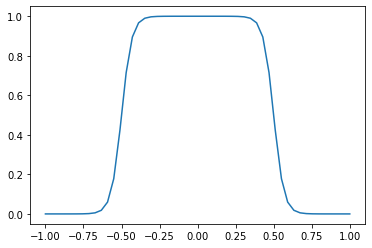

In [26]:
from helperTools import*
L=1
x=np.linspace(-L,L)
y=1/(1+np.exp(30*(abs(x)-L/2)/L))
plt.plot(x,y)


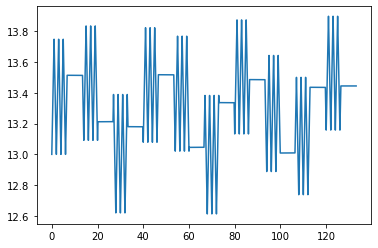

In [73]:
@numba.njit()
def is_Even(x: int)-> bool:
    """Test if a number is even"""


    return True if x%2==0 else False
v0=10.0
L=1.
tau=5.0*L/v0
FMax=10.0
h=1e-5
TMax=10.0
T=0.0
m=1.0
@numba.njit()
def force(x,t):
    Fpos=FMax if is_Even(int(x/L)) else -FMax
    timeFact=1.0 if is_Even(int(t/tau)) else 0.0
    return Fpos*timeFact
x=0.0
vx=v0+3.0
xList,vxList=[],[]
Flist=[]
while T<TMax:
    a1=force(x,T)/m
    x=x+vx*h+.5*a1*h**2
    a2=force(x,T)/m
    vx=vx+(a1+a2)*h/2.0
    xList.append(x)
    vxList.append(vx)
    T+=h

TArr=np.linspace(0,T,len(xList))
plt.plot(xList,vxList)
plt.show()
# plt.plot(TArr,vxList)
# plt.show()

In [79]:
import skopt
from skopt.utils import  cook_estimator
bounds=[(-1.0,1.0)]*10
base_estimator = cook_estimator("GP", space=bounds,noise=.005)
opt=skopt.Optimizer(bounds,base_estimator=base_estimator,n_initial_points=0,n_jobs=-1,
                    acq_optimizer_kwargs={"n_restarts_optimizer":10,"n_points":30_000})

numTrainSamples=100
x=[list(np.random.random_sample(len(bounds))) for _ in range(numTrainSamples)]
y=[np.random.random_sample() for _ in range(numTrainSamples)]

t=time.time()
opt.tell(x,y) #train model
opt.ask(20,)
print(time.time()-t)


158.04161095619202


In [81]:
a=(2*n for n in range(10))
all(a)

False

In [247]:
swarmSystemTraced=Swarm()
for particleInjector,particleRing in zip(swarmInjectorTraced.particles,swarmRingTraced.particles):
    assert particleInjector.traced is True
    particle=Particle(qi=particleInjector.qi,pi=particleInjector.pi)
    particle.traced=True
    didParticleInjectorClip=particleInjector.clipped or model.does_Injector_Particle_Clip_On_Ring(particleInjector)
    if didParticleInjectorClip:
        particle.clipped=didParticleInjectorClip
    else:
        particle.T=particleInjector.T+particleRing.T
        particle.clipped=particleRing.clipped
    swarmSystemTraced.add(particle)
len(swarmSystemTraced.particles)

4995

-0.002004008016032177 -0.002004008016032177


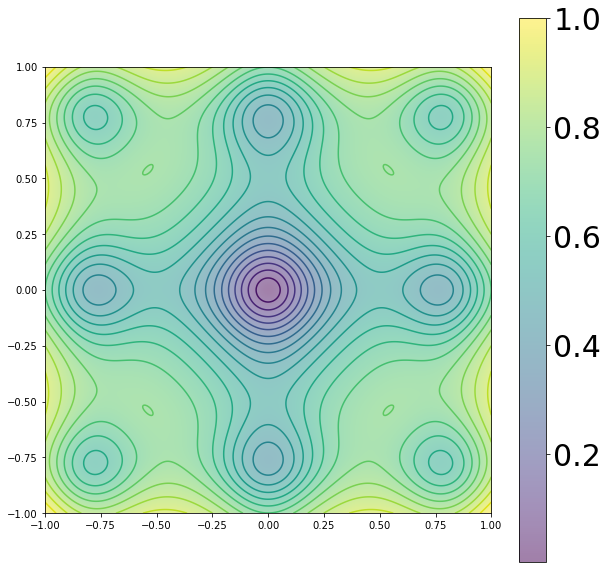

In [140]:
from helperTools import *
xEdge=np.linspace(-1,1,500)
yEdge=np.linspace(-1,1,500)
X,Y=np.meshgrid(xEdge,yEdge)
xArr=np.ravel(X)
yArr=np.ravel(Y)
np.random.seed(42)
def func(x,y):
    x=1.25*x
    y=1.25*y
    arg1 = -0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x) + np.cos(2. * np.pi * y))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e+np.random.random_sample()*.0
v=np.array([func(x,y) for x,y in zip(xArr,yArr)])
v/=v.max()
print(xArr[np.argmin(v)],yArr[np.argmin(v)])
v=v.reshape((len(yEdge),len(xEdge)))
plt.figure(figsize=(10,10))
plt.imshow(v,alpha=0.5,extent=[xEdge.min(),xEdge.max(),yEdge.min(),yEdge.max()])
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=30)
plt.contour(X,Y,v,20)

plt.show()

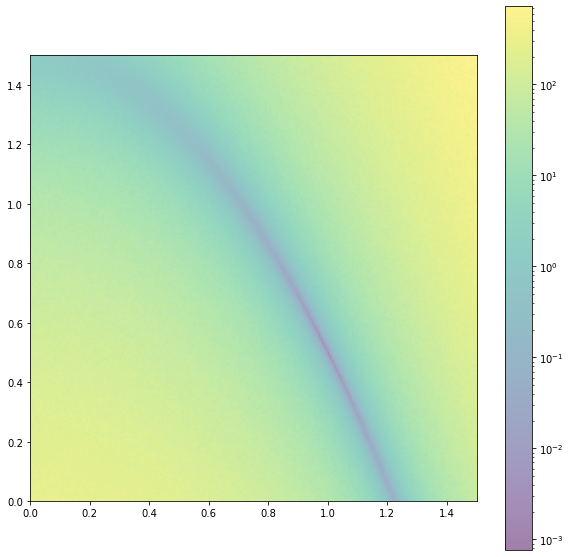

0.0007680184177805239

In [178]:
import matplotlib
xEdge=np.linspace(0,1.5,200)
yEdge=np.linspace(0,1.5,200)
X,Y=np.meshgrid(xEdge,yEdge)
xArr=np.ravel(X)
yArr=np.ravel(Y)
np.random.seed(42)
a,b=1,100
def func(x,y):
    return ((a-x)**2+b*(y-x**2)**2)*(1+np.random.random_sample()*.5)
v=np.array([func(x,y) for x,y in zip(xArr,yArr)])
v[v<1e-6]=1e-6
# v=np.log10(v)
v=v.reshape((len(yEdge),len(xEdge)))
plt.figure(figsize=(10,10))
plt.imshow(v,alpha=0.5,extent=[xEdge.min(),xEdge.max(),yEdge.min(),yEdge.max()],norm=matplotlib.colors.LogNorm())
cbar=plt.colorbar()
# cbar.ax.tick_params(labelsize=30)
# plt.contour(X,Y,v,20)

plt.show()
v.min()

In [175]:
from octopusOptimizer import octopus_Optimize
a,b=1,100
def func(args):
    x,y=args
    return (a-x)**2+b*(y-x**2)**2+np.random.random_sample()*.5
xi=[0,0]
bounds=[(-5,5),(-5,5)]
octopus_Optimize(func,bounds,xi,processes=1)

best of iter: 0 1.1494560206022082 array([0, 0])
didnt find food
best of iter: 1 1.1494560206022082 array([0, 0])


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


found food
best of iter: 2 0.9405631251866033 array([ 0.1       , -0.00869327])
found food
best of iter: 3 0.8455703375406206 array([ 0.10196765, -0.00842964])
didnt find food
best of iter: 4 0.8455703375406206 array([ 0.10196765, -0.00842964])
didnt find food
best of iter: 5 0.8455703375406206 array([ 0.10196765, -0.00842964])
found food
best of iter: 6 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 7 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 8 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 9 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 10 0.8389334718944604 array([0.10055483, 0.00042187])


KeyboardInterrupt: 

In [1]:
import itertools
import os
from asyncDE import solve_Async
from typing import Union,Optional
import numpy as np
import warnings
from constants import DEFAULT_ATOM_SPEED
from storageRingOptimizer import StorageRingModel
from ParticleTracerLatticeClass import ElementDimensionError,ElementTooShortError,CombinerDimensionError
from elementPT import HalbachLensSim
import matplotlib.pyplot as plt
from elementPT import HalbachLensSim
from latticeModels import make_Injector_Version_1,make_Ring_Surrogate_For_Injection_Version_1,InjectorGeometryError
from latticeModels_Constants import constants_Version1,lockedDict
import dill
from injectionOptimizer import Injection_Model,surrogateParams

paramsInjector=np.array([0.28653747, 0.03600941, 0.1008204 , 0.01997145 ,0.14831874 ,0.03622285,
          0.01285372, 0.05       ,0.10830639, 0.21335858])

PTL_I=make_Injector_Version_1(paramsInjector)
PTL_R=make_Ring_Surrogate_For_Injection_Version_1(paramsInjector,surrogateParams)

model=Injection_Model(PTL_R,PTL_I)


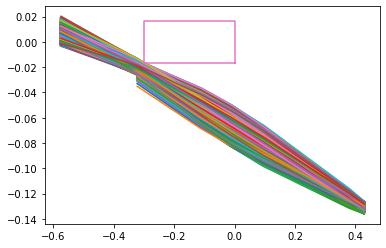

(108.3921891424954, 271.36403180203695)

In [4]:
%matplotlib inline
swarm=model.trace_Through_Injector_And_Transform_To_Ring(False)
swarm.num_Particles(weighted=True),model.swarmInjectorInitial.num_Particles(weighted=True) #(116.35938725733523, 271.36403180203695)

In [3]:
swarmInjectorTraced = model.swarmTracerInjector.trace_Swarm_Through_Lattice(
    model.swarmInjectorInitial.quick_Copy()
    , model.h, 1.0, parallel=False, copySwarm=False,
    accelerated=False,logPhaseSpaceCoords=True)

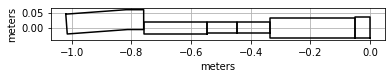

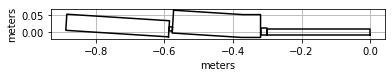

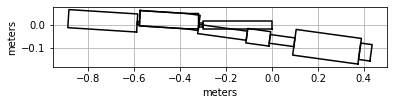

In [4]:
model.latticeInjector.show_Lattice()
model.latticeRing.show_Lattice()
model.show_Floor_Plan()

In [23]:
from skopt import Optimizer
import numpy as np
from helperTools import low_Discrepancy_Sample
import time
def func(X):
    return np.exp(np.linalg.norm(X))+np.sin(3*X[0]+np.pi/.53243)+np.cos(X[1])-np.sin(2*X[2])
bounds=[(-1.0,1.0),(-1.,1.0),(-1.0,1.0)]
_initCoords=low_Discrepancy_Sample(bounds,1_000_000)
_vals=[func(coord) for coord in _initCoords]
xMin=_initCoords[np.argmin(_vals)]
valMin=np.min(_vals)
xMin,valMin

(array([-0.29231071,  0.01222432,  0.40662479]), 0.9716902150985816)

In [55]:

initCoords=low_Discrepancy_Sample(bounds,200)
vals=[func(coord) for coord in initCoords]
initCoords=[list(coord) for coord in initCoords]
t=time.time()
opt=Optimizer(bounds,base_estimator='GP',acq_func='EI')
for _ in range(1):
    opt.tell(initCoords,vals)
    xTest=opt.ask()
    initCoords.append(xTest)
    val=func(np.array(xTest))
    print(val)
    vals.append(val)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


0.9746299224850333


In [47]:
dims=16
slices=5
numPonts=slices**dims
evalTimeSeconds=2*60
cpuSeconds=evalTimeSeconds*numPonts
cpuHours=cpuSeconds/60
cpuDays=cpuHours/24
cpuYears=cpuDays/365
cpuCenturies=cpuYears/100
cpuCenturies

348374.1795091324

94

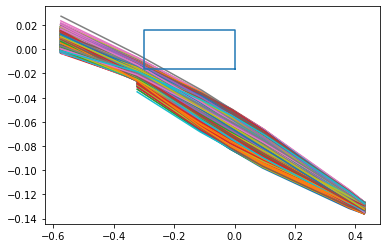

In [6]:
from shapely.geometry import LineString


def convert_Pos_Injector_Frame_To_Ring_Frame(X):
    X=X[:2].copy()
    X+=-model.latticeInjector.combiner.r2[:2]
    X=model.latticeInjector.combiner.RIn@model.latticeInjector.combiner.RIn@X
    X+=model.latticeRing.combiner.r2[:2]
    return X

def make_Shapely_Line_In_Ring_Frame_From_Injector_Particle(particle)->Optional[LineString]:
    if len(particle.elPhaseSpaceLog)==0:
        return None
    qList=[]
    for q,p in particle.elPhaseSpaceLog:
        qRingFrame_2D=convert_Pos_Injector_Frame_To_Ring_Frame(q)
        qList.append(qRingFrame_2D)
    line=LineString(qList)
    return line

def does_Injector_Particle_Clip_On_Ring(particle):
    line=make_Shapely_Line_In_Ring_Frame_From_Injector_Particle(particle)
    lens=model.latticeRing.elList[0]
    assert len(model.latticeRing.elList)==5 and type(lens) is HalbachLensSim
    return line.intersects(lens.SO_Outer)

clipped=0
for particle in swarmInjectorTraced.particles:
    line=make_Shapely_Line_In_Ring_Frame_From_Injector_Particle(particle)
    plt.plot(*line.coords.xy)
    # model.show_Floor_Plan()
    # line.intersects(model.latticeRing.elList[0].SO_Outer)
    clipped+=does_Injector_Particle_Clip_On_Ring(particle)
plt.plot(*model.latticeRing.elList[0].SO_Outer.exterior.xy)
clipped

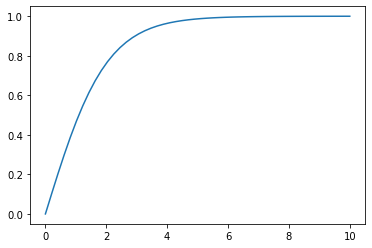

In [10]:
from scipy.special import expit
sigmoid=lambda x: 2*(expit(x)-.5)
xArr=np.linspace(0,10)
plt.plot(xArr,sigmoid(xArr))

In [ ]:
swarmInjectorTraced.particles[5].elPhaseSpaceLog[-1][0]

In [1]:
from injectionOptimizer import Injection_Model
from storageRingOptimizer import StorageRingModel,Solution

from ParticleTracerLatticeClass import ParticleTracerLattice
from ParticleClass import Swarm,Particle

PTL_Ring=ParticleTracerLattice()
PTL_Ring.add_Halbach_Lens_Sim(.02,.1)
PTL_Ring.add_Drift(.02)
PTL_Ring.add_Combiner_Sim_Lens(.15,.03)
PTL_Ring.add_Drift(.1)
PTL_Ring.add_Drift(.1)
PTL_Ring.end_Lattice(constrain=False)


PTL_Injector=ParticleTracerLattice(latticeType='injector')
PTL_Injector.add_Drift(.1)
PTL_Injector.add_Halbach_Lens_Sim(.01,.1)
PTL_Injector.add_Drift(.1)
PTL_Injector.add_Halbach_Lens_Sim(.01,.1)
PTL_Injector.add_Combiner_Sim_Lens(.15,.03)
PTL_Injector.end_Lattice()



In [2]:
model=Injection_Model(PTL_Ring,PTL_Injector)

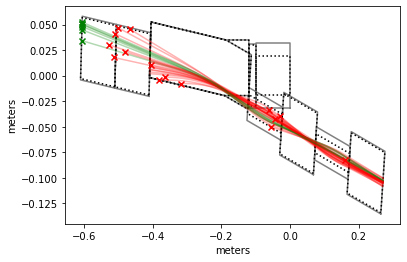

In [46]:
%matplotlib inline
model.show_Floor_Plan_And_Trajectories()

In [79]:
model.swarmInjectorInitial.particles=model.swarmInjectorInitial.particles[:100]
swarmInjectorTraced = model.swarmTracerInjector.trace_Swarm_Through_Lattice(
            model.swarmInjectorInitial.quick_Copy(), 2e-6, 1.0, parallel=False,
            fastMode=False, copySwarm=False, accelerated=False,logPhaseSpaceCoords=True)
swarmRingInitial = model.transform_Swarm_From_Injector_Frame_To_Ring_Frame(swarmInjectorTraced,
                                                                          copyParticles=True,onlyUnclipped=False)
swarmRingTraced=model.swarmTracerRing.trace_Swarm_Through_Lattice(swarmRingInitial,2e-6,1,fastMode=False,
                                                                 parallel=False)
# %matplotlib inline
# model.latticeRing.show_Lattice(swarm=swarmRingInitial,trueAspectRatio=False,showTraceLines=True)

In [82]:
from helperTools import *
from shapely.geometry import LineString
lensSO=PTL_Ring.elList[0].SO_Outer

for particleInj,particleRing in zip(swarmInjectorTraced,swarmRingTraced):
    assert not (particleInj.clipped and not particleRing.clipped) #this wouldn't make sense

    if particleInj.qArr is not None and len(particleInj.qArr)>1:
        qInj_RingFrame=np.array([model.convert_Pos_Injector_Frame_To_Ring_Frame(q) for q in particleInj.qArr])
        line=LineString(qInj_RingFrame[:,:2])
        assert lensSO.intersects(line) == model.does_Injector_Particle_Clip_On_Ring(particleInj) #test that clipping works
        #agrees

        if particleRing.qArr is not None and len(particleRing.qArr)>1:
            #assert particles are on top of each other at handoff between injector and ring, and that they are
            #very collinear
            assert iscloseAll(particleRing.qArr[0],qInj_RingFrame[-1],1e-12)
            assert iscloseAll(particleRing.qArr[1]-particleRing.qArr[0],qInj_RingFrame[-1]-qInj_RingFrame[-2],1e-10)

In [62]:
r2Inj=PTL_Injector.combiner.r2
r2Ring=PTL_Ring.combiner.r2

assert iscloseAll(model.convert_Pos_Injector_Frame_To_Ring_Frame(r2Inj),r2Ring,1e-12)
PTL_Ring.combiner.r1,PTL_Ring.combiner.inputOffset

(array([-0.12      ,  0.00771402,  0.        ]), -0.007739092989533963)

In [115]:
from helperTools import *
import skopt
# paramsHead=np.array([0,0,0.0])

# bounds=[(-1.0,0.0),(0.0,.5),(-1.0,5.0)]
def get_Probe_Vals(paramsHead,bounds):
    tentacleLengthFact=1e-2
    boundsArr=np.array(bounds).astype(float)
    numTentacles=20
    
    # probeParams=[]
    # for _ in range(numTentacles):
    # skopt.sampler.Sobol().generate(bounds,numTentacles)
    tentacleLengths=tentacleLengthFact*(bounds[:,1]-bounds[:,0])
    # tentacleLengths
    probeBounds=list(np.column_stack((-1*tentacleLengths,tentacleLengths)))
    skopt.sampler.Sobol().generate(probeBounds,numTentacles)
    paramsProbe=paramsHead+skopt.sampler.Sobol().generate(probeBounds,numTentacles)
    for i,params in enumerate(paramsProbe):
        paramsProbe[i]=np.clip(params,boundsArr[:,0],boundsArr[:,1])
    return paramsProbe

array([[ 0.00000000e+00,  0.00000000e+00, -3.52905691e-02],
       [-3.58731162e-04,  6.36953854e-05,  2.47094309e-02],
       [ 0.00000000e+00,  0.00000000e+00,  5.47094309e-02],
       [-5.35873116e-03,  2.56369539e-03, -5.29056907e-03],
       [-2.85873116e-03,  0.00000000e+00,  3.97094309e-02],
       [ 0.00000000e+00,  3.81369539e-03, -2.02905691e-02],
       [ 0.00000000e+00,  0.00000000e+00,  9.70943093e-03],
       [-7.85873116e-03,  1.31369539e-03, -5.02905691e-02],
       [-6.60873116e-03,  0.00000000e+00,  2.20943093e-03],
       [ 0.00000000e+00,  3.18869539e-03, -5.77905691e-02],
       [ 0.00000000e+00,  0.00000000e+00,  3.22094309e-02],
       [-1.60873116e-03,  6.88695385e-04, -2.77905691e-02],
       [-4.10873116e-03,  0.00000000e+00, -4.27905691e-02],
       [ 0.00000000e+00,  1.93869539e-03,  1.72094309e-02],
       [ 0.00000000e+00,  0.00000000e+00, -1.27905691e-02],
       [-9.10873116e-03,  4.43869539e-03,  4.72094309e-02],
       [-8.48373116e-03,  0.00000000e+00

In [25]:
from helperTools import *
swarm=Swarm()
for q in (PTL_Injector.combiner.r1,PTL_Injector.combiner.r2):
    particle=Particle()
    particle.traced=True
    particle.qf,particle.pf=q,np.array([-PTL_Ring.v0Nominal,0,0])
    swarm.add(particle)
swarm=opt.transform_Swarm_From_Injector_Frame_To_Ring_Frame(swarm)
assert iscloseAll(swarm.particles[0].qi,PTL_Ring.combiner.r1,1e-12)
assert iscloseAll(swarm.particles[1].qi,PTL_Ring.combiner.r2,1e-12)

False

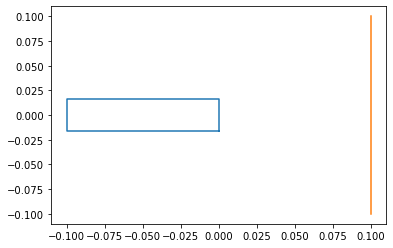

In [21]:
# opt.does_Injector_Particle_Clip_On_Ring()
from shapely.geometry import LineString
line=LineString([(.1,-.1),(.1,.1)])
SO=PTL_Ring.elList[0].SO_Outer
plt.plot(*SO.exterior.xy)
plt.plot(*line.xy)
particle=Particle()
particle.traced=True
particle.elPhaseSpaceLog=[(np.array([.1,-.1,0]), np.zeros(3)),(np.array([.1,.1,0]), np.zeros(3) )]
opt.does_Injector_Particle_Clip_On_Ring(particle)

In [30]:
2.6e-4 * 124500 *2`**3/30

8.632

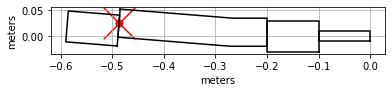

In [13]:
PTL_Ring.show_Lattice(particleCoords=coords)

In [ ]:
# PTL = ParticleTracerLattice(200.0, latticeType='storageRing')
#
# PTL.add_Halbach_Lens_Sim(.01, .5)
# PTL.add_Drift(.1)
# PTL.add_Combiner_Sim_Lens(.1, .02)
# PTL.add_Halbach_Lens_Sim(.01, .5)
# PTL.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, None, 1, 0.0, rOffsetFact=1.)
# PTL.add_Halbach_Lens_Sim(.01, 1., constrain=True)
# PTL.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, None, 1, 0.0, rOffsetFact=1.)
# PTL.end_Lattice(enforceClosedLattice=False, constrain=True,surpressWarning=True)

In [ ]:
def get_Error(fact):
    PTL = ParticleTracerLattice(200.0, latticeType='storageRing')


    PTL.add_Drift(.1)
    PTL.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, 300, 1, 0.0, rOffsetFact=fact)
    PTL.end_Lattice(enforceClosedLattice=False, constrain=False,surpressWarning=True)

    from ParticleTracerClass import ParticleTracer
    from ParticleClass import Particle
    pt=ParticleTracer(PTL)
    particle=Particle(qi=np.array([-1e-10,-.1e-3,0.0]))

    particle=pt.trace(particle,1e-5,.01,fastMode=False,accelerated=False)
    PTL.show_Lattice(particle=particle,showTraceLines=True,trueAspectRatio=False)
    particle.plot_Orbit_Reference_Frame_Position()
    particle.plot_Energies(showOnlyTotalEnergy=True)
    error=np.std([q[1] for q in particle.qoArr])
    return error #0.0003401014791188453
# offsetList=list(np.linspace(.95,1.1,10))
# errors=[get_Error(offset) for offset in offsetList]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(offsetList,errors)
plt.show()

In [ ]:

PTL = ParticleTracerLattice(200.0, latticeType='storageRing')
PTL.add_Drift(.1)
PTL.add_Combiner_Sim_Lens(.15,.04)
# PTL.add_Halbach_Lens_Sim(.02,.1,.9)
# PTL.add_Drift(.1)
# PTL.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, 300, 1, 0.0)
PTL.end_Lattice(enforceClosedLattice=False, constrain=False,surpressWarning=True)
from ParticleTracerClass import ParticleTracer
from ParticleClass import Particle
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,2e-3,0.0]))
particle=pt.trace(particle,1e-5,.01,fastMode=False,accelerated=False)
%matplotlib inline
PTL.show_Lattice(particle=particle,showTraceLines=True,trueAspectRatio=False)



In [ ]:
PTL.elList[1].force(np.array([.1,0,0]))
PTL.elList[1].r2

In [ ]:
[q[1] for q in particle.qoArr]

In [ ]:
particle.plot_Orbit_Reference_Frame_Position()

In [ ]:
%matplotlib inline
from storageRingGeometries import Line,Kink,CappedSlicedBend
from storageRingGeometry import StorageRingGeometry
from storageRingGeometrySolver import StorageRingConstraintSolver
firstEl=Line(.5)
firstEl.place(np.array([0.0,0.0]),-np.pi)
Lcap=0.02135#PTL_True.bender1.Lcap



elements=[
    firstEl,
    Line(.1),
    Kink(-0.07288109082330438,L2,L1),
    Line(.5),
    CappedSlicedBend(.0127,240,magnetDepth,Lcap,1.),
    Line(1.5,constrained=True),
    CappedSlicedBend(.0127,230,magnetDepth,Lcap,1.0042770601252802)
]



storageRing=StorageRingGeometry(elements)
storageRing.build()
storageRing.show_Geometry()
solver=StorageRingConstraintSolver(storageRing,1.0)
params=solver.solve()
solver.update_Ring(params)
storageRing=solver.storageRing
# storageRing=solver.make_Valid_Storage_Ring()
storageRing.show_Geometry()
params

In [ ]:
import matplotlib.pyplot as plt
def build(PTL,storageRing):
    #todo: assert that each element lines up as expected
    for i,elements in enumerate(zip(PTL.elList,storageRing)):
        el_PTL,el_Geom=elements
        if type(el_Geom) is Line:
            el_PTL.r1=np.array([*el_Geom.pos_in,0])
            el_PTL.r2=np.array([*el_Geom.pos_out,0])
            el_PTL.nb=np.array([*el_Geom.n_in,0])
            el_PTL.ne=np.array([*el_Geom.n_out,0])

            theta=np.arctan2(el_Geom.n_out[1],el_Geom.n_out[0])
            if theta<0:
                theta+=np.pi*2
            el_PTL.theta=theta
            el_PTL.ROut = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
            el_PTL.RIn = np.asarray([[np.cos(-theta), -np.sin(-theta)], [np.sin(-theta), np.cos(-theta)]])
        if type(el_Geom) is Kink:

            n_out_perp=-np.flip(el_Geom.n_out)*np.array([-1,1])
            # r2+
            r2=(el_Geom.pos_out+n_out_perp*el_PTL.outputOffset)
            el_PTL.r2=np.array([*r2,0.0])
            el_PTL.r2[1]=0.014609633588606709

            r1=r2+-el_Geom.n_out*el_PTL.Lb+el_Geom.n_in*el_PTL.La
            el_PTL.r1=np.array([*r1,0])

            el_PTL.nb=np.array([*el_Geom.n_in,0])
            el_PTL.ne=np.array([*el_Geom.n_out,0])

            theta=np.arctan2(el_Geom.n_out[1],el_Geom.n_out[0])-np.pi #todo: i think this might be wrong, or not the right way to hink about it

            theta=theta+2*np.pi #conventino
            el_PTL.theta=theta

            rot=el_PTL.theta
            el_PTL.ROut = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
            rot=-rot
            el_PTL.RIn = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]])#np.linalg.inv(el_PTL.ROut)
        if type(el_Geom) is CappedSlicedBend:
            print("need to include shifting this over for offset effect")

            el_PTL.r1=np.array([*el_Geom.pos_in,0])
            el_PTL.r2=np.array([*el_Geom.pos_out,0])
            el_PTL.nb=np.array([*el_Geom.n_in,0])
            el_PTL.ne=np.array([*el_Geom.n_out,0])
            el_PTL.r0=np.array([*el_Geom.benderCenter,0])
            # print(el_PTL.r1)
            n=-el_Geom.n_in
            theta=np.arctan2(n[1],n[0])
            if theta<0:
                theta+=np.pi*2
            print(n,theta)
            el_PTL.theta=theta

            rot=el_PTL.theta- el_PTL.ang + np.pi / 2
            el_PTL.ROut = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
            rot=-rot
            el_PTL.RIn = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]])#np.linalg.inv(el_PTL.ROut)

build(PTL,storageRing)
# %matplotlib tk
PTL.make_Geometry()
PTL.show_Lattice(trueAspectRatio=True)

In [ ]:
%matplotlib inline
from ParticleTracerClass import ParticleTracer
from ParticleClass import Particle
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,-.1e-3,0.0]))

particle=pt.trace(particle,1e-5,1,fastMode=False,accelerated=False)
PTL.show_Lattice(particle=particle,showTraceLines=True,trueAspectRatio=False)
np.set_printoptions(precision=100)
print(particle.qf) #[-7.3317516263831284e-01  3.4424809584164646e-03 -5.2940775338183833e-06]

In [ ]:
particle.plot_Orbit_Reference_Frame_Position()

In [ ]:
el=PTL.elList[-1]
q=np.array([.5,.5,0])
# print(el.r1,el.r2)
# print(el.ROut)
# print(el.r2)
# print(el.transform_Element_Coords_Into_Lab_Frame(q))
# print(el.ROut)#@q[:2])#+el.r1[:2])
print(el.ROut)
print(el.RIn)

In [ ]:
PTL_Compare = ParticleTracerLattice(200.0, latticeType='storageRing')


PTL_Compare.add_Halbach_Lens_Sim(.01, .5)
PTL_Compare.add_Combiner_Sim_Lens(.1, .02)
PTL_Compare.add_Halbach_Lens_Sim(.01, .5)
PTL_Compare.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, 251, 1.0419898531028318, 0.0, rOffsetFact=1.)
PTL_Compare.add_Halbach_Lens_Sim(.01, 1.1156855236430039, constrain=True)
PTL_Compare.add_Halbach_Bender_Sim_Segmented(.0254 / 2, .01, 251, 1.0418702761406033, 0.0, rOffsetFact=1.)
PTL_Compare.end_Lattice(enforceClosedLattice=True, constrain=True,surpressWarning=True)


In [ ]:
PTL_Compare.bender1.rb,PTL_Compare.bender2.rb,PTL_Compare.bender1.numMagnets,PTL_Compare.bender2.numMagnets

In [ ]:
el=PTL_Compare.elList[-1]
q=np.array([.5,.5,0])
# print(el.r1,el.r2)
# print(el.ROut)
# print(el.r2)
# print(el.transform_Element_Coords_Into_Lab_Frame(q))
# print(el.ROut)#@q[:2])#+el.r1[:2])
print(el.ROut)
print(el.RIn)


In [ ]:
from ParticleTracerClass import ParticleTracer
from ParticleClass import Particle
pt=ParticleTracer(PTL_Compare)
particle=Particle(qi=np.array([-1e-10,-1e-3,0.0]))

particle=pt.trace(particle,1e-5,1,fastMode=False,accelerated=False)
PTL_Compare.show_Lattice(particle=particle,showTraceLines=True,trueAspectRatio=False)
np.set_printoptions(precision=100)
print(particle.qf) #[-6.287784633004588e-01 -3.911591601543401e-03 -4.206831835417686e-06]

In [ ]:
particle.plot_Orbit_Reference_Frame_Position()

In [ ]:
#set first element
PTL.elList[0].r1=storageRing.elements[0].pos_in
PTL.elList[0].r2=storageRing.elements[0].pos_out
n=storageRing.elements[0].n_out
theta=np.arctan2(n[1],n[0])
PTL.elList[0].theta=theta
rot=theta
PTL.elList[0].ROut = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
#rotating out of the element reference frame

In [ ]:
#set combiner
combEl=PTL.elList[1]
combShape=storageRing.elements[1]
n_out_perp=-np.flip(combShape.n_out)*np.array([-1,1])
# r2+
r2=(combShape.pos_out+n_out_perp*combEl.outputOffset)
combEl.r2=np.array([r2[0],r2[1],0.0])

r1=r2+-combShape.n_out*combEl.Lb+combShape.n_in*combEl.La
combEl.r1=np.array([r1[0],r1[1],0])

theta=PTL.elList[0].theta
theta = 2 * np.pi - combEl.ang - (
        np.pi - theta)  # Tilt the combiner down by el.ang so y=0 is perpindicular
# to the input. Rotate it 1 whole revolution, then back it off by the difference. Need to subtract
# np.pi because the combiner's input is not at the origin, but faces 'east'
theta = theta - 2 * np.pi * (theta // (2 * np.pi))  # the above logic can cause the element
# to have to rotate more than 360 deg


combEl.theta=theta

rot=combEl.theta
combEl.ROut = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
#rotating out of the element reference frame
theta,combEl.ang

In [ ]:
PTL.make_Geometry()

In [ ]:
%matplotlib tk
PTL.show_Lattice()

In [11]:
from numba_stats import norm
norm.pdf(0.0,0.0,10.0)

array(0.03989423)

In [ ]:
from SwarmTracerClass import SwarmTracer
st=SwarmTracer(PTL_True)
swarm=st.initalize_PseudoRandom_Swarm_In_Phase_Space(5e-3,5.0,1.0,1000)
swarm=st.trace_Swarm_Through_Lattice(swarm,5e-6,1,fastMode=True)

In [38]:
from helperTools import *
from constants import *
rp=.6
T=.01
vRel=1e2*np.sqrt(16 * BOLTZMANN_CONSTANT*T/(3.14 *MASS_LITHIUM_7))
sigma=5e-13
v=210*1e2
Flux=2e12*500
A=np.pi*(.7*rp)**2
I=Flux/A
n=I/v
l=1/(np.sqrt(2)*n*sigma)
vRel/l

47.21549651412601

In [42]:
float_Kelvin=float
float_meters=float
def scattering_Rate(T: float_Kelvin,rp: float_meters):
    assert rp<.1 and T<.1 #reasonable values
    rp*=1e2 #convert to cm
    vRel=1e2*np.sqrt(16 * BOLTZMANN_CONSTANT*T/(3.14 *MASS_LITHIUM_7)) #cm/s
    sigma=5e-13 #cm^2
    speed=210*1e2 #cm^2
    flux=2e12*500 #1/s
    area=np.pi*(.7*rp)**2 #cm
    n=flux/(area*speed) #1/cm^3
    meanFreePath=1/(np.sqrt(2)*n*sigma)
    return vRel/meanFreePath
scattering_Rate(.01,.01)

16.997578745085367

In [90]:
import numba
from numba.experimental import jitclass
@jitclass([('a',numba.types.unicode_type),
           ('b',numba.float64),
           ('c',numba.int64)])
class poop:
    def __init__(self):
        self.a='a'
        self.b=2.0
        self.c=3

poo=poop()
%timeit poop()

2.63 µs ± 38.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


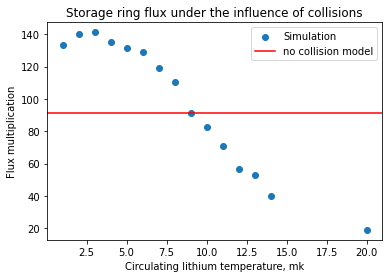

In [103]:
res=[133.12747755802948, 140.27885009841324, 141.22793660956452, 135.4874919947779, 131.72251599032012, 129.17155980008903, 119.28016157792038, 110.6190413848261, 91.54714335716547, 82.63165617539292, 70.64025870944323, 56.4425280821248, 52.62536289967612, 40.19285010371332, 18.948608342594255]

TArr=np.arange(0.001,.015,.001)
TArr=1e3*np.append(TArr,.02)
plt.scatter(TArr,res,label='Simulation')
plt.title("Storage ring flux under the influence of collisions")
plt.ylabel("Flux multiplication")
plt.xlabel("Circulating lithium temperature, mk")
plt.axhline(y=91,c='r',label='no collision model')
plt.legend()
plt.show()

In [69]:
@numba.njit
def mixed_value_type_str_key_dict():
    # str -> mixed types, including array and typed dictionary!
    a = {'a': 1, 'b': 'string', 'c': np.arange(5), 'd': {10:20, 30:40}}

    print('getitem', a['d']) # getitem works
    [print("key", k) for k in a.keys()] # keys() works
    print('len', len(a)) # non-mutating call on the dictionary is ok
    print("contains ", 'a' in a, 'z' in a) # and contains as it's read only
    # it's slightly contrived, but .items() also works


mixed_value_type_str_key_dict()

getitem {10: 20, 30: 40}
key a
key b
key c
key d
len 4
contains  True False


In [123]:
def full_Arctan(q):
    """Compute angle spanning 0 to 2pi degrees as expected from x and y where q=numpy.array([x,y,z])"""
    phi = np.arctan2(q[1], q[0])
    if phi < 0:  # confine phi to be between 0 and 2pi
        phi += 2 * np.pi
    return phi

In [76]:
#values
s0=210.0
T=.01

In [170]:
# lens

rp=.02
qEl=np.array([.2,rp/3,-rp/2])
x,y,z=qEl

sigma=np.sqrt(BOLTZMANN_CONSTANT*T/MASS_LITHIUM_7)
FWHM=2.355*sigma
trapFactY=(1-(y/rp)**2)
trapFactZ=(1-(z/rp)**2)
assert trapFactZ>=0.0 and trapFactY>=0.0
delta_px,py,pz=FWHM*2*(np.random.random_sample(3)-.5)
py,pz=py*trapFactY,pz*trapFactZ
px=s0+delta_px
pCollision=(px,py,pz)
pCollision

(205.89436883373398, 4.881527298918776, -0.19991783017430087)

In [171]:

theta=1.215
rp=.02
ro=1.01
r=1.011
x,y=r*np.cos(theta),r*np.sin(theta)
z=rp/5.0
qEl=np.array([x,y,z])


In [197]:

#bender
theta=full_Arctan(qEl)
r=np.sqrt(x**2+y**2)
xo=r-ro
yo=qEl[2]
trapFactXo=(1-(xo/rp)**2) if xo<=rp else 0.0
trapFactYo=(1-(yo/rp)**2)
assert all(0.0<=fact<=1.0 for fact in (trapFactYo,trapFactXo))
L=s0*ro
delta_pso,pxo,pyo=FWHM*2*(np.random.random_sample(3)-.5)
pso=L/r+delta_pso
pCollision=np.array([pso,pxo,pyo])



array([208.82260908,   6.50248248,  -2.19312246])

In [175]:
l=s0*r
l/(r+rp),s0


(205.9262851600388, 210.0)